In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime,timedelta
import time
import seaborn as sns
sns.set()

In [2]:
df_2010 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2010.csv')
df_2011 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2011.csv')
df_2012 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2012.csv')
df_2013 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2013.csv')
df_2014 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2014.csv')
df_2015 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2015.csv')
df_2016 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2016.csv')
df_2017 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2017.csv')
df_2018 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2018.csv')
df_2019 = pd.read_csv('../data/shooting/curry-2009-2019/curry-2019.csv')
def_rating = pd.read_csv('../data/defensive-rating/tm-defrtg-avg-2009-2019.csv',index_col=0)

In [3]:
df_all = pd.concat([df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019], axis=0)
df_all = df_all.drop(['x', 'y', 'shot_description', 'game_score'], axis=1)

# dates from the 'date' col aren't datetime, so convert them to
df_all['date'] = pd.to_datetime(df_all['date'])

In [4]:
df_all.groupby('date')['shot_made'].count() # shots attempted

date
2009-10-28    12
2009-10-30     9
2009-11-04     6
2009-11-06     5
2009-11-08     8
2009-11-09     8
2009-11-11     7
2009-11-14     9
2009-11-17    10
2009-11-18    10
2009-11-20     9
2009-11-24    12
2009-11-25    16
2009-11-28    15
2009-11-30     5
2009-12-01    14
2009-12-03     8
2009-12-05    12
2009-12-07    14
2009-12-09    13
2009-12-11     9
2009-12-12    10
2009-12-14    13
2009-12-16    11
2009-12-18    17
2009-12-22    15
2009-12-23    13
2009-12-26    10
2009-12-28     4
2009-12-29    10
              ..
2019-03-27    20
2019-03-29    25
2019-03-31    14
2019-04-02    11
2019-04-04    14
2019-04-05    21
2019-04-07    20
2019-04-09     4
2019-04-13    15
2019-04-15    18
2019-04-18    11
2019-04-21    14
2019-04-24    15
2019-04-26    14
2019-04-28    12
2019-04-30    15
2019-05-04    23
2019-05-06    25
2019-05-08    23
2019-05-10    19
2019-05-14    23
2019-05-16    21
2019-05-18    25
2019-05-20    25
2019-05-30    18
2019-06-02    16
2019-06-05    31
2019-06-0

In [5]:
df_all.groupby('date')['shot_made'].sum() # shots made

date
2009-10-28     7.0
2009-10-30     5.0
2009-11-04     3.0
2009-11-06     1.0
2009-11-08     4.0
2009-11-09     2.0
2009-11-11     3.0
2009-11-14     6.0
2009-11-17     6.0
2009-11-18     4.0
2009-11-20     3.0
2009-11-24     6.0
2009-11-25     5.0
2009-11-28     5.0
2009-11-30     2.0
2009-12-01     4.0
2009-12-03     4.0
2009-12-05     6.0
2009-12-07     9.0
2009-12-09     6.0
2009-12-11     3.0
2009-12-12     5.0
2009-12-14     5.0
2009-12-16     4.0
2009-12-18     9.0
2009-12-22     6.0
2009-12-23     6.0
2009-12-26     4.0
2009-12-28     0.0
2009-12-29     6.0
              ... 
2019-03-27     7.0
2019-03-29    13.0
2019-03-31     8.0
2019-04-02     6.0
2019-04-04     3.0
2019-04-05    12.0
2019-04-07    11.0
2019-04-09     2.0
2019-04-13    11.0
2019-04-15     8.0
2019-04-18     7.0
2019-04-21     3.0
2019-04-24     7.0
2019-04-26     8.0
2019-04-28     5.0
2019-04-30     6.0
2019-05-04     7.0
2019-05-06    12.0
2019-05-08     9.0
2019-05-10     9.0
2019-05-14    12.0
2019-05

In [6]:
df_all.groupby(['date', 'quarter'])['shot_made'].count() # shot attempts per quarter

date        quarter
2009-10-28  1           3
            2           3
            4           6
2009-10-30  1           2
            2           2
            3           2
            4           3
2009-11-04  1           4
            2           1
            3           1
2009-11-06  1           3
            3           2
2009-11-08  2           2
            3           3
            4           3
2009-11-09  1           1
            2           3
            3           2
            4           2
2009-11-11  2           2
            4           5
2009-11-14  1           1
            2           4
            3           3
            4           1
2009-11-17  1           3
            2           1
            3           4
            4           2
2009-11-18  1           2
                       ..
2019-05-18  2           4
            3           6
            4           7
2019-05-20  1           7
            2           4
            3           7
            4     

In [7]:
df_all.groupby(['date', 'quarter'])['shot_made'].sum() # shots made per quarter

date        quarter
2009-10-28  1          1.0
            2          0.0
            4          6.0
2009-10-30  1          1.0
            2          2.0
            3          0.0
            4          2.0
2009-11-04  1          2.0
            2          0.0
            3          1.0
2009-11-06  1          0.0
            3          1.0
2009-11-08  2          1.0
            3          1.0
            4          2.0
2009-11-09  1          0.0
            2          1.0
            3          1.0
            4          0.0
2009-11-11  2          1.0
            4          2.0
2009-11-14  1          1.0
            2          2.0
            3          3.0
            4          0.0
2009-11-17  1          2.0
            2          1.0
            3          2.0
            4          1.0
2009-11-18  1          0.0
                      ... 
2019-05-18  2          2.0
            3          2.0
            4          4.0
2019-05-20  1          4.0
            2          3.0
        

In [8]:
test_df = df_all
test_df.head(30)

,date,home,vs,quarter,time_left,shot_made,shot_value,shot_distance
0,2009-10-28,True,HOU,1,11:25,False,3,27
1,2009-10-28,True,HOU,1,09:31,True,2,19
2,2009-10-28,True,HOU,1,06:02,False,2,14
3,2009-10-28,True,HOU,2,09:49,False,2,19
4,2009-10-28,True,HOU,2,02:19,False,2,16
5,2009-10-28,True,HOU,2,00:34,False,2,4
6,2009-10-28,True,HOU,4,10:26,True,2,16
7,2009-10-28,True,HOU,4,06:31,True,2,17
8,2009-10-28,True,HOU,4,02:25,True,2,20
9,2009-10-28,True,HOU,4,01:47,True,2,18


In [9]:
# CUMULATIVE SHOTS AND ATTEMPTS
# cumsum by date help from https://stackoverflow.com/a/51854277
cum_shot_made = df_all.groupby(df_all['date'].dt.date)['shot_made'].cumsum()
# cum_shot_mades

cum_attempts = df_all.groupby(df_all['date'].dt.date)['shot_made'].cumcount()
cum_attempts = cum_attempts + 1

In [10]:
df_all['cum_shot_made'] = cum_shot_made
df_all['cum_attempts'] = cum_attempts
df_all['cum_fg_percent'] = df_all['cum_shot_made'] / df_all['cum_attempts']

In [11]:
# GET GAME TIME
def strToDatetime(string):
    return datetime.strptime(string, '%M:%S')

df_all['time_left'] = df_all['time_left'].apply(strToDatetime)
df_all['game_time'] = pd.to_datetime(df_all['time_left'], format='%H:%M')
df_all['game_time'] = pd.to_timedelta(df_all['game_time'] - pd.datetime(1900, 1, 1))
#Convert to Minutes
df_all['game_time'] = df_all['game_time'].dt.total_seconds() / 60
df_all['game_time'] = df_all['quarter'] * 12 - df_all['game_time']

In [12]:
# DROP CURRY'S CURRENT TEAM
def drop_team(df,team):
    return df.drop([team]) #DROP PLAYERS OWN TEAM 

def_rating = drop_team(def_rating,'Golden State Warriors')

In [13]:
# REORDER DF COLS
df_all = df_all[["date",'home','vs','quarter','time_left', 'game_time', 'shot_made', 'cum_shot_made', 'cum_attempts', 'cum_fg_percent', 'shot_value', 'shot_distance']]
# df_final.head()

In [14]:
df_all

,date,home,vs,quarter,time_left,game_time,shot_made,cum_shot_made,cum_attempts,cum_fg_percent,shot_value,shot_distance
0,2009-10-28,True,HOU,1,1900-01-01 00:11:25,0.583333,False,0.0,1,0.000000,3,27
1,2009-10-28,True,HOU,1,1900-01-01 00:09:31,2.483333,True,1.0,2,0.500000,2,19
2,2009-10-28,True,HOU,1,1900-01-01 00:06:02,5.966667,False,1.0,3,0.333333,2,14
3,2009-10-28,True,HOU,2,1900-01-01 00:09:49,14.183333,False,1.0,4,0.250000,2,19
4,2009-10-28,True,HOU,2,1900-01-01 00:02:19,21.683333,False,1.0,5,0.200000,2,16
5,2009-10-28,True,HOU,2,1900-01-01 00:00:34,23.433333,False,1.0,6,0.166667,2,4
6,2009-10-28,True,HOU,4,1900-01-01 00:10:26,37.566667,True,2.0,7,0.285714,2,16
7,2009-10-28,True,HOU,4,1900-01-01 00:06:31,41.483333,True,3.0,8,0.375000,2,17
8,2009-10-28,True,HOU,4,1900-01-01 00:02:25,45.583333,True,4.0,9,0.444444,2,20
9,2009-10-28,True,HOU,4,1900-01-01 00:01:47,46.216667,True,5.0,10,0.500000,2,18


In [15]:
#EXTRACT THEIR RANKINGS 
top_def = def_rating.iloc[0:10]
mid_def = def_rating.iloc[10:19]
bot_def = def_rating.iloc[19:30]

In [16]:
#SUBSET DATAFRAME TO TOP, MID, BOTTOM TIER
top_def_DF = df_all[df_all['vs'].isin(top_def['Acronym'].values)]
mid_def_DF = df_all[df_all['vs'].isin(mid_def['Acronym'].values)]
bot_def_DF = df_all[df_all['vs'].isin(bot_def['Acronym'].values)]

In [17]:
df_all.to_csv('../data/shot-data-all.csv')
top_def_DF.to_csv('../data/top-def.csv')
mid_def_DF.to_csv('../data/mid-def.csv')
bot_def_DF.to_csv('../data/bot-def.csv')

In [27]:
warriors_palette = ['#006BB6', '#FDB927', '#26282A']
sns.set_palette(sns.color_palette(warriors_palette))

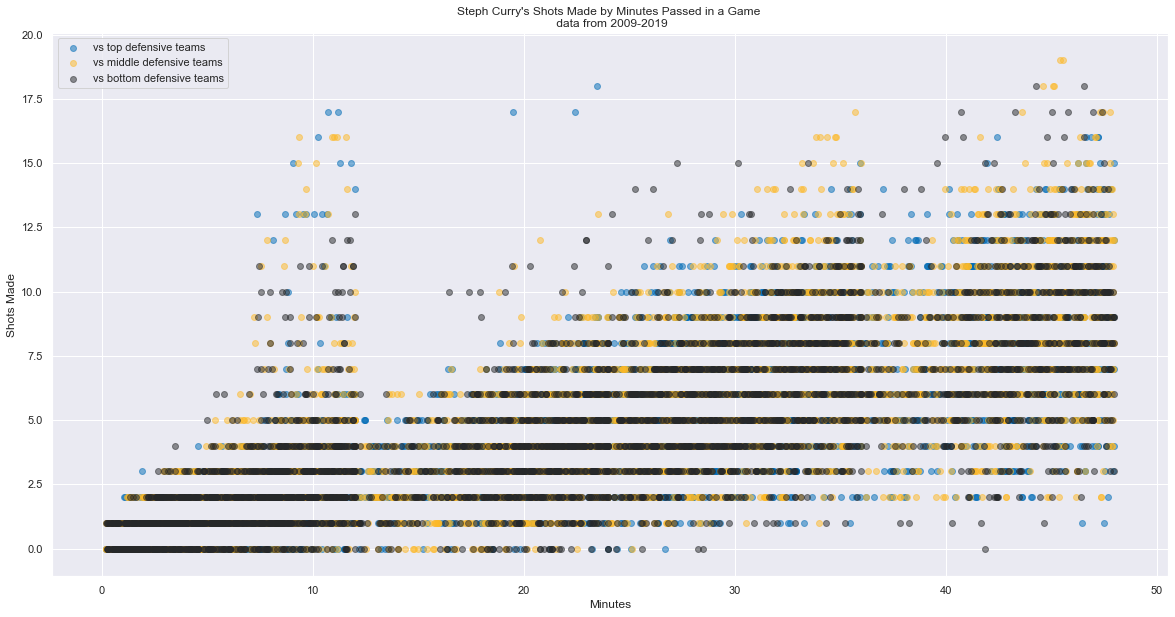

In [28]:
plt.subplots(figsize=(20,10))
plt.scatter(top_def_DF['game_time'],top_def_DF['cum_shot_made'],alpha = 0.5, label='vs top defensive teams')
plt.scatter(mid_def_DF['game_time'],mid_def_DF['cum_shot_made'],alpha = 0.5, label='vs middle defensive teams')
plt.scatter(bot_def_DF['game_time'],bot_def_DF['cum_shot_made'],alpha = 0.5, label='vs bottom defensive teams')
plt.legend(loc='best')
plt.title('Steph Curry\'s Shots Made by Minutes Passed in a Game \n data from 2009-2019')
plt.xlabel('Minutes')
plt.ylabel('Shots Made')
# plt.show()
plt.savefig('../curry-shots-made-by-minutes.png')

In [19]:
trial = top_def_DF[(top_def_DF['cum_shot_made'] > 9) & (top_def_DF['game_time'] < 1)]

In [20]:
#top_def_DF[(top_def_DF['date'] == '2013-03-01') | (top_def_DF['date'] == '2013-02-26')]

In [21]:
#TRIAL AND ERROR FOR cum_shot_made
# derp2 = df_all.groupby(df_all['date'].dt.date)['shot_made'].cumsum()
# derp3 = df_all
# derp3['cum_shot_made_fixed'] = derp2
# # test
# derp3
# plt.subplots(figsize=(20,10))
# plt.scatter(derp3['game_time'], derp3['cum_shot_made_fixed'])

In [22]:
#USING 2018-2019 as our validation 
#USING 2009-2017 FOR TRAINING
filter_2019 = top_def_DF[(top_def_DF['date'] <= '2017-12-31')]
with_2019 = top_def_DF[(top_def_DF['date'] > '2017-12-31')]

In [23]:
df_all

,date,home,vs,quarter,time_left,game_time,shot_made,cum_shot_made,cum_attempts,cum_fg_percent,shot_value,shot_distance
0,2009-10-28,True,HOU,1,1900-01-01 00:11:25,0.583333,False,0.0,1,0.000000,3,27
1,2009-10-28,True,HOU,1,1900-01-01 00:09:31,2.483333,True,1.0,2,0.500000,2,19
2,2009-10-28,True,HOU,1,1900-01-01 00:06:02,5.966667,False,1.0,3,0.333333,2,14
3,2009-10-28,True,HOU,2,1900-01-01 00:09:49,14.183333,False,1.0,4,0.250000,2,19
4,2009-10-28,True,HOU,2,1900-01-01 00:02:19,21.683333,False,1.0,5,0.200000,2,16
5,2009-10-28,True,HOU,2,1900-01-01 00:00:34,23.433333,False,1.0,6,0.166667,2,4
6,2009-10-28,True,HOU,4,1900-01-01 00:10:26,37.566667,True,2.0,7,0.285714,2,16
7,2009-10-28,True,HOU,4,1900-01-01 00:06:31,41.483333,True,3.0,8,0.375000,2,17
8,2009-10-28,True,HOU,4,1900-01-01 00:02:25,45.583333,True,4.0,9,0.444444,2,20
9,2009-10-28,True,HOU,4,1900-01-01 00:01:47,46.216667,True,5.0,10,0.500000,2,18
